In [1]:
# import
from nptdms import TdmsFile # https://nptdms.readthedocs.io/en/stable/
from matplotlib import pyplot as plt
import numpy as np
%matplotlib widget

In [2]:
# read in the file and extract the important signals
file = TdmsFile.read("tdms/Mike3/Mike3_DF_-250.tdms")
time = file["DynamicFriction"]["Time [s]"][:]
vel = file["DynamicFriction"]["Velocity [deg/s]"][:]
cur = file["DynamicFriction"]["Current [A]"][:]

torque_constant = 0.137  # Mike6: 0.0302 Nm/A; Mike1-5 & 7: 0.137 Nm/A

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
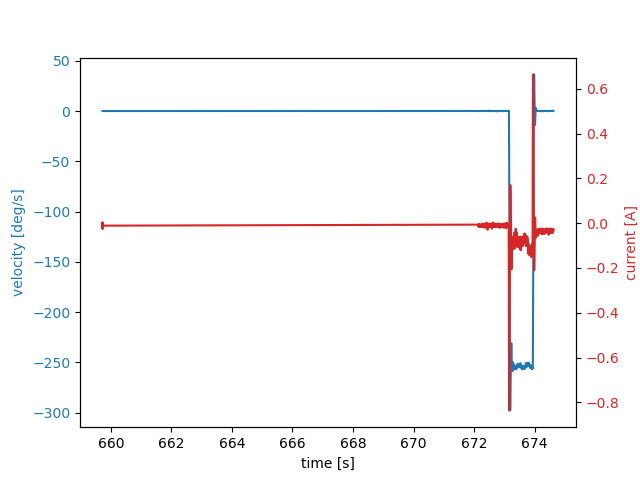

In [3]:
# plot the current and the velocity over time
fig, axs = plt.subplots()
color = "tab:blue"
axs.set_xlabel("time [s]")
axs.set_ylabel("velocity [deg/s]",color=color)
axs.plot(time, vel, color=color)
axs.tick_params(axis="y", labelcolor = color)

ax2 = axs.twinx()
color = "tab:red"
ax2.set_xlabel("time [s]")
ax2.set_ylabel("current [A]",color=color)
ax2.plot(time, cur, color=color)
ax2.tick_params(axis="y", labelcolor = color)

In [4]:
# find start and end of reliable current measurements; read start and end time from velocity plot (velocity should be as stable as possible)
start_time = 673.3
end_time = 673.8

start_index = 0
end_index = 0

for i in range(0,len(time)):
    if time[i] >= start_time:
        start_index = i
        break
for i in range(0,len(time)):
    if time[i] >= end_time:
        end_index = i
        break
print(start_index, end_index)

717 959


In [5]:
# calculate average current consumed in the above determined measurement range
sum = 0
count = 0
for i in range(start_index, end_index):
    sum += cur[i]
    count += 1
avg_cur = sum/count
friction_torque = avg_cur*torque_constant
print("friction torque:",friction_torque,"Nm")
print("average measured current:",avg_cur,"A")

plt.close('all')

friction torque: -0.011187817462998805 Nm
average measured current: -0.08166290118977229 A
